# Módulo: Aprendizaje No Supervisado
## Detección de Anomalías y Novedades

# Introducción

<center>
    <img src="figures/dogcat-1.png" width="1000"/>
</center>

<center>
    <img src="figures/anomaly-1.png" width="800"/>
</center>

## Detección de anomalías
- Los datos de entrenamiento contienen datos atípicos.
- Los datos atípicos están en regiones lejanas a los otros datos y de baja densidad.
- Los modelos deben encontrar las regiones donde se ubican la mayoría de los datos.

## Detección de novedades
- Los datos de entrenamiento no contienen datos atípicos.
- Los modelos deberán determinar si una nueva muestra es atípica o no.
- Los datos atípicos podrían eventualmente formar un grupo denso.

# One-Class SVM

## Adaptación Schölkopf
Proyecta datos a un espacio hiperdimensional y los separa del origen usando un hiperplano.

<center>
    <img src="figures/oneclass-svm-1.png" width="500"/>
</center>

Un hiperparámetro $\nu$ fija la **fracción de datos atípicos** en el entrenamiento.

Se maximiza la distancia entre hiperplano y origen, dejando datos por debajo como anomalías.



## Adaptación Tax
Proyecta datos a un espacio hiperdimensional y los separa del origen usando una hiperesfera

<center>
    <img src="figures/oneclass-svm-2.png" width="500"/>
</center>

Se puede usar un margen suave para admitir ciertas anomalías en los datos

Se minimiza el volumen de la esfera, dejando datos afuera como anomalías.


## One-class SVM en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

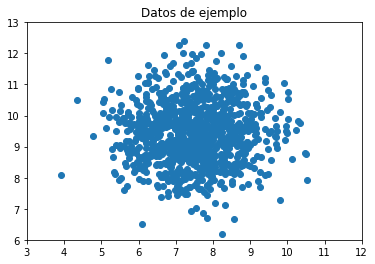

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=1000, centers=1, n_features=2, random_state=8)
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(3, 12), plt.ylim(6, 13)
plt.title('Datos de ejemplo')
plt.show()

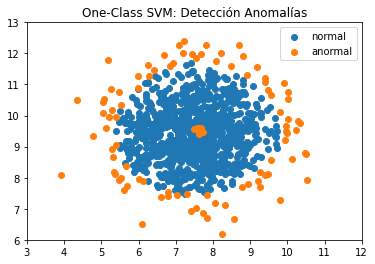

In [10]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(kernel='rbf', nu=0.1).fit(X)
y_predict = clf.predict(X)
plt.scatter(X[:, 0][y_predict == 1], X[:, 1][y_predict == 1], label='normal')
plt.scatter(X[:, 0][y_predict == -1], X[:, 1][y_predict == -1], label='anormal')
plt.xlim(3, 12), plt.ylim(6, 13), plt.title('One-Class SVM: Detección Anomalías')
plt.legend()
plt.show()

# Bosque de aislamiento (Isolation Forest)

## Generalidades
Utiliza aislamiento de los datos atípicos en vez de caracterizar los datos tìpicos.

El aislamiento se realiza recursivamente mediante árboles binarios que eligen valores de corte para distintos atributos.

<center>
    <img src="figures/iforest-2.png" width="700"/>
</center>

## Formulación
- Se define el camino hacia un dato como el número de particiones que un árbol debe realizar para poder aislarlo.
- El algoritmo calcula el camino promedio hasta cada dato para varios árboles inicializados de forma aleatoria.
- Se considera que los datos atípicos son los que tienen caminos más cortos.
- Un hiperparámetro "contamination" representa la proporción de datos atípicos y se usa para estimar un umbral entre un "camino corto" y un "camino largo"

<center>
    <img src="figures/iforest-1.jpg" width="1200"/>
</center>

## Bosque de aislamiento en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

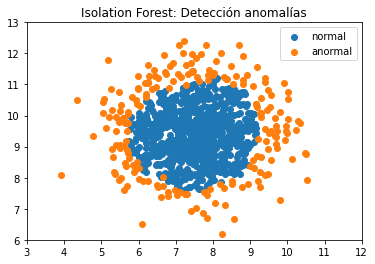

In [7]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, max_samples=256, contamination='auto', random_state=0).fit(X)
y_predict = clf.predict(X)
plt.scatter(X[:, 0][y_predict == 1], X[:, 1][y_predict == 1], label='normal')
plt.scatter(X[:, 0][y_predict == -1], X[:, 1][y_predict == -1], label='anormal')
plt.xlim(3, 12), plt.ylim(6, 13), plt.title('Isolation Forest: Detección anomalías')
plt.legend()
plt.show()

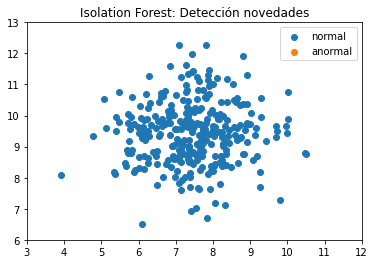

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = IsolationForest(n_estimators=100, max_samples=256, contamination=0., random_state=0).fit(X_train)

#X_test = np.append(X_test, [[11.9, 6.1]], axis=0)
y_test_predict = clf.predict(X_test)
plt.scatter(X_test[:, 0][y_test_predict == 1], X_test[:, 1][y_test_predict == 1], label='normal')
plt.scatter(X_test[:, 0][y_test_predict == -1], X_test[:, 1][y_test_predict == -1], label='anormal')
plt.xlim(3, 12), plt.ylim(6, 13), plt.title('Isolation Forest: Detección novedades')
plt.legend()
plt.show()

# Factor de anomalía local (Local outlier factor, LOF)

### Generalidades
Encuentra datos atípicos comparando densidades locales de los datos.

La densidad local se estima en base a los $k$ vecinos más cercanos a un dato.

<center>
    <img src="figures/lof-1.png" width="500"/>
</center>

Comparte los conceptos de datos núcleo y datos alcanzables del método DBSCAN.


## Formulación
La densidad local de un dato se estima con el inverso de la suma de las distancias alcanzables de sus $k$ vecinos más cercanos.

<center>
    <img src="figures/lof-2.png" width="400"/>
</center>

Se define el LOF de un dato como la razón entre la densidad local promedio de sus $k$ vecinos más cercanos y su propia densidad local.

<center>
    <img src="figures/lof-3.png" width="400"/>
</center>

- LOF>1 significa vecinos con densidad mayor al propio dato (dato atípico)
- LOF<1 significa vecinos con densidad menor al propio dato (dato típico)


## Factor de anomalía local en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

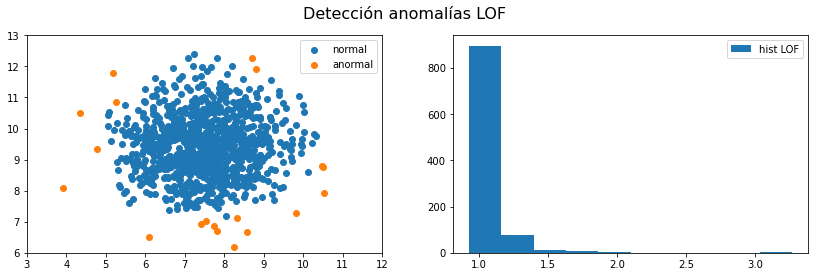

In [18]:
from sklearn.neighbors import LocalOutlierFactor

outlier = LocalOutlierFactor(n_neighbors=10)
y_predict = outlier.fit_predict(X)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(14, 4)
ax[0].scatter(X[:, 0][y_predict == 1], X[:, 1][y_predict == 1], label='normal')
ax[0].scatter(X[:, 0][y_predict == -1], X[:, 1][y_predict == -1], label='anormal')
ax[0].set_xlim(left=3, right=12)
ax[0].set_ylim(bottom=6, top=13)
ax[1].hist(-outlier.negative_outlier_factor_, label='hist LOF')
ax[0].legend(), ax[1].legend()
fig.suptitle('Detección anomalías LOF', fontsize=16)
plt.show()

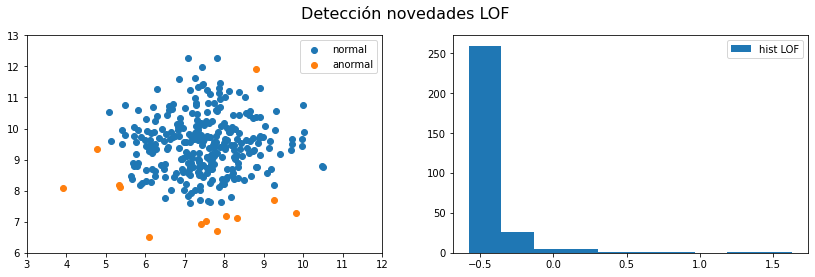

In [19]:
novelty = LocalOutlierFactor(n_neighbors=10, novelty=True)
novelty.fit(X_train)
y_test_predict = novelty.predict(X_test)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(14, 4)
ax[0].scatter(X_test[:, 0][y_test_predict == 1], X_test[:, 1][y_test_predict == 1], label='normal')
ax[0].scatter(X_test[:, 0][y_test_predict == -1], X_test[:, 1][y_test_predict == -1], label='anormal')
ax[0].set_xlim(left=3, right=12)
ax[0].set_ylim(bottom=6, top=13)
ax[1].hist(-novelty.decision_function(X_test), label='hist LOF')
ax[0].legend(), ax[1].legend()
fig.suptitle('Detección novedades LOF', fontsize=16)
plt.show()

# Sumario
- Los  métodos de detección de anomalías y novedades permiten encontrar datos atípicos dentro de una muestra.
- One-class SVM es una adaptación del SVM para la aplicación en detección de anomalías.
- El bosque de aislamiento permite utilizar árboles de decisión para aislar anomalías o novedades.
- El factor de anomalía local es una adaptación de DBSCAN para detectar anomalías o novedades.